In [2]:
import json
import os
import pandas as pd

# load group4 metadata json
with open('./grp4-metadata.json', 'r') as file:  # Replace with your file name if different
    grp_metadata_json = json.load(file)

# load caltech_images_202100113.json which contains the datetime info
with open('./caltech_images_20210113.json', 'r') as file:  # Replace with your file name if different
    raw_metadata_json = json.load(file)

# convert to pandas df
grp_meta_df = pd.DataFrame(grp_metadata_json)
raw_meta_img_df = pd.DataFrame(raw_metadata_json['images'])
# set index to "id"
raw_meta_img_df.set_index('id', inplace=True)



In [10]:
import seaborn as sns   
import matplotlib.pyplot as plt

In [3]:
raw_meta_img_df.head()

,seq_num_frames,date_captured,seq_id,height,width,location,rights_holder,file_name,frame_num
id,,,,,,,,,
5968c0f9-23d2-11e8-a6a3-ec086b02610b,1,2013-10-04 13:31:53,6f2160eb-5567-11e8-990e-dca9047ef277,1494,2048,26,Erin Boydston,5968c0f9-23d2-11e8-a6a3-ec086b02610b.jpg,1
5a0b016f-23d2-11e8-a6a3-ec086b02610b,1,2013-11-04 18:37:07,6f27ed66-5567-11e8-9e92-dca9047ef277,1494,2048,26,Erin Boydston,5a0b016f-23d2-11e8-a6a3-ec086b02610b.jpg,1
59b93afb-23d2-11e8-a6a3-ec086b02610b,3,2012-05-09 07:33:45,6f04895c-5567-11e8-a3d6-dca9047ef277,1494,2048,38,Justin Brown,59b93afb-23d2-11e8-a6a3-ec086b02610b.jpg,2
59641f56-23d2-11e8-a6a3-ec086b02610b,3,2012-03-29 02:34:13,6f0385b5-5567-11e8-a80b-dca9047ef277,1494,2048,38,Justin Brown,59641f56-23d2-11e8-a6a3-ec086b02610b.jpg,2
5a1e5306-23d2-11e8-a6a3-ec086b02610b,3,2012-05-08 19:23:36,6f0a3ccf-5567-11e8-92fb-dca9047ef277,1494,2048,33,Justin Brown,5a1e5306-23d2-11e8-a6a3-ec086b02610b.jpg,2


In [4]:
# add datetime info to grp_meta_df based on raw_meta_img_df on "id"
grp_meta_df['date_captured'] = grp_meta_df['image_id'].map(raw_meta_img_df['date_captured'])
grp_meta_df.head()

,filename,label,category_id,bbox,image_id,location,split_type,date_captured
0,5998cfa4-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[499.2, 711.68, 353.28, 199.68]",5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,train,2011-05-13 23:43:18
1,588a679f-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[985.6, 783.36, 368.64, 230.4]",588a679f-23d2-11e8-a6a3-ec086b02610b,115,train,2012-03-17 03:48:44
2,593d68d7-23d2-11e8-a6a3-ec086b02610b_0.jpg,squirrel,5,"[1779.2, 407.04, 61.44, 84.48]",593d68d7-23d2-11e8-a6a3-ec086b02610b,90,train,2011-06-28 15:29:42
3,59fae563-23d2-11e8-a6a3-ec086b02610b_0.jpg,rabbit,10,"[1456.0, 480.0, 156.8, 137.6]",59fae563-23d2-11e8-a6a3-ec086b02610b,46,val,2012-01-05 07:41:39
4,595f7b9c-23d2-11e8-a6a3-ec086b02610b_0.jpg,rodent,99,"[249.3516082764, 798.4633789062, 291.603164672...",595f7b9c-23d2-11e8-a6a3-ec086b02610b,67,val,2014-09-28 01:00:53


In [6]:
# sort by date captured before saving to csv
grp_meta_df['date_captured'] = pd.to_datetime(grp_meta_df['date_captured'], errors='coerce')
grp_meta_df = grp_meta_df.sort_values(by='date_captured')
grp_meta_df.head()

,filename,label,category_id,bbox,image_id,location,split_type,date_captured
15820,585f4d43-23d2-11e8-a6a3-ec086b02610b_0.jpg,cat,16,"[1200.64, 568.32, 146.7734375, 246.613359375]",585f4d43-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 20:32:56
3499,59180801-23d2-11e8-a6a3-ec086b02610b_0.jpg,cat,16,"[999.253359375, 404.48, 129.706640625, 218.453...",59180801-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 20:32:57
44281,588dba7d-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[1213.44, 637.44, 212.48, 271.36]",588dba7d-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:28
34228,58bea7d7-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[1062.4, 808.96, 279.04, 238.08]",58bea7d7-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:29
36935,58a8a344-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[870.4, 960.0, 261.12, 337.92]",58a8a344-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:30


In [7]:
# save to csv
grp_meta_df.to_csv('./grp4_metadata_with_datetime.csv', index=False)

In [68]:
# eda/dist plots
# plot category distribution per month over time

def plot_monthly_class_distribution(df, feature_name = 'label', production_start_idx=None, color_palette='husl'):
    """
    Plots the monthly distribution of the specified class in the dataset
    
    Parameters:
    - df: DataFrame containing 'date_captured' and 'label' columns.
    - class_name: The name of the class column to analyze (default is 'label'). can be 'location' 
    
    - production_start_idx: Optional; date to indicate the index where production split starts in time-sorted df.
    """
    # Convert 'date_captured' to datetime if not already
    df['date_captured'] = pd.to_datetime(df['date_captured'], errors='coerce')
    
    # Filter by date range if specified
    #if start_date:
    #    df = df[df['date_captured'] >= pd.to_datetime(start_date)]
    #if end_date:
    #    df = df[df['date_captured'] <= pd.to_datetime(end_date)]
    
    # Extract year and month from 'date_captured'
    df['year_month'] = df['date_captured'].dt.to_period('M')
    
    # Group by year_month and label, then count occurrences
    monthly_counts = df.groupby(['year_month', feature_name]).size().unstack(fill_value=0)

    # add missing year_month to the monthly_counts DataFrame
    all_periods = pd.period_range(start=df['year_month'].min(), end=df['year_month'].max(), freq='M')
    monthly_counts = monthly_counts.reindex(all_periods, fill_value=0)

    # sort columns according to their order of appearance in the time-series dataset
    time_sorted_feature_cats = df[feature_name].unique().tolist()
    monthly_counts = monthly_counts.reindex(columns=time_sorted_feature_cats)

    
    #monthly_counts.index = monthly_counts.index.astype(str)  # Convert PeriodIndex to string for better plotting
    
    # Plotting
    plt.figure(figsize=(14, 8))
    sns.set_palette(color_palette, n_colors=df[feature_name].nunique())
    ax = monthly_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
    # If production_start_idx is provided, add a vertical line to the plot
    if production_start_idx:
        # Get the production start date from the index
        production_start_idx = int(production_start_idx)
        # Get the date at the production start index
        production_start_date = df['date_captured'].iloc[production_start_idx]
        production_start_year_month = production_start_date.to_period('M')
        production_start_x = monthly_counts.index.get_loc(production_start_year_month)
        
        

        # split the dataset into modeling and production datasets according to production start idx
        modeling_df = df[:production_start_idx]
        production_df = df[production_start_idx:]

        # get count distribution of labels for modeling and production datasets
        # show distribution of labels in modeling and production datasets
        labels_distribution_df = pd.DataFrame({'label': df['label'].unique()})
        labels_distribution_df.set_index('label', inplace=True)
        # Add modeling and production counts to the labels_distribution_df
        labels_distribution_df['modeling count'] = modeling_df['label'].value_counts().reindex(labels_distribution_df.index, fill_value=0)
        labels_distribution_df['production count'] = production_df['label'].value_counts().reindex(labels_distribution_df.index, fill_value=0)

        current_legend_labels = [t.get_text() for t in ax.legend_.texts]

        # Add modeling and production counts to the legend
        #display(current_legend_labels)
    
        # sort labels distribution df according to current legend labels
        labels_distribution_df = labels_distribution_df.reindex(current_legend_labels, axis=0, fill_value=0)
        display(labels_distribution_df)

        
        
        # Add modeling and production counts to the legend
        legend_labels = [f"{i}: ({labels_distribution_df['modeling count'][i]} - {labels_distribution_df['production count'][i]})" for i in labels_distribution_df.index]

        ax.legend(legend_labels, title='Label (Dev/Prod Count)', loc='upper left')
        #ax.legend(labels_distribution_df, title='Dataset', loc='upper left')
        #display(current_legend_labels)
        plt.axvline(x=production_start_x, color='red', linestyle='--', label='Production Start')

        # add annotations to the vertical line

        image_split_info = f'image file count: {len(modeling_df)} ({len(modeling_df) / len(df) * 100:.2f}%) / {len(production_df)} ({len(production_df) / len(df) * 100:.2f}%)'

        date_span = df['date_captured'].max() - df['date_captured'].min()
        total_days = date_span.days
        production_days = df['date_captured'].max() - production_start_date
        production_days = production_days.days
        modeling_days = total_days - production_days
        #display(f"production days: {production_days}, total days: {total_days}")

        day_split_info = f"days count: {modeling_days} ({modeling_days / total_days * 100:.2f}%) / {production_days} ({(production_days) / total_days * 100:.2f}%)"


        plt.annotate(#f'Dev/Production Split:\nsample index:{production_start_idx}\nimg count : {len(modeling_df)} ({len(modeling_df) / len(df) * 100:.2f}%) / {len(production_df)} ({len(production_df) / len(df) * 100:.2f}%)', 
                     f'DATASET SPLIT TIMING\nsample index:{production_start_idx}\n{image_split_info}\n{day_split_info}', 
                     xy=(production_start_x, monthly_counts.max().max()+2000), 
                     
                     #xytext=(production_start_x + 5, monthly_counts.max().sum() * 0.9),
                     xytext=(production_start_x + 2, (monthly_counts.max().max()+2000) * 0.9),
                     arrowprops=dict(arrowstyle="->", linewidth=1, color='red', alpha = 0.8), 
                     fontsize=10, color='black',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", lw=1, facecolor='white', alpha=0.8)
        )   
             
    else:
        ax.legend(title='Labels')

    # set x-ticks label to be the actual year and the actual month numbers
    
    #display(monthly_counts.head())
    plt.title(f'Monthly {feature_name} Distribution Over Time')
    plt.xlabel('year_month')
    plt.ylabel('Count')
    #plt.xticks(ticks=range(len(monthly_counts)), labels=monthly_counts['Year-Month'], rotation=90)

  
    # create legend for the feature_name
    #plt.legend(legend)

    plt.tight_layout()
    

    if production_start_idx:
        # show count distributions of labels based on production split 
        sns.set_palette("tab10")
        plt.figure()
        # Create a bar plot for the labels distribution
        sns.barplot(data=labels_distribution_df.reset_index().melt(id_vars='label'), 
                    x='label', y='value', hue='variable')
        # Set the title and labels
        plt.title(f'Image Files Count Distribution for Production Split Idx @ {production_start_idx}')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.legend(title='Dataset')
        # Show the plot
        plt.tight_layout()
        
    
    plt.show()

    return monthly_counts

,modeling count,production count
label,,
cat,2958,1433
opossum,9445,2689
squirrel,2314,334
raccoon,6920,988
bird,761,3265
rabbit,3518,2507
dog,2052,808
badger,21,7
bobcat,3804,1244


<Figure size 1400x800 with 0 Axes>

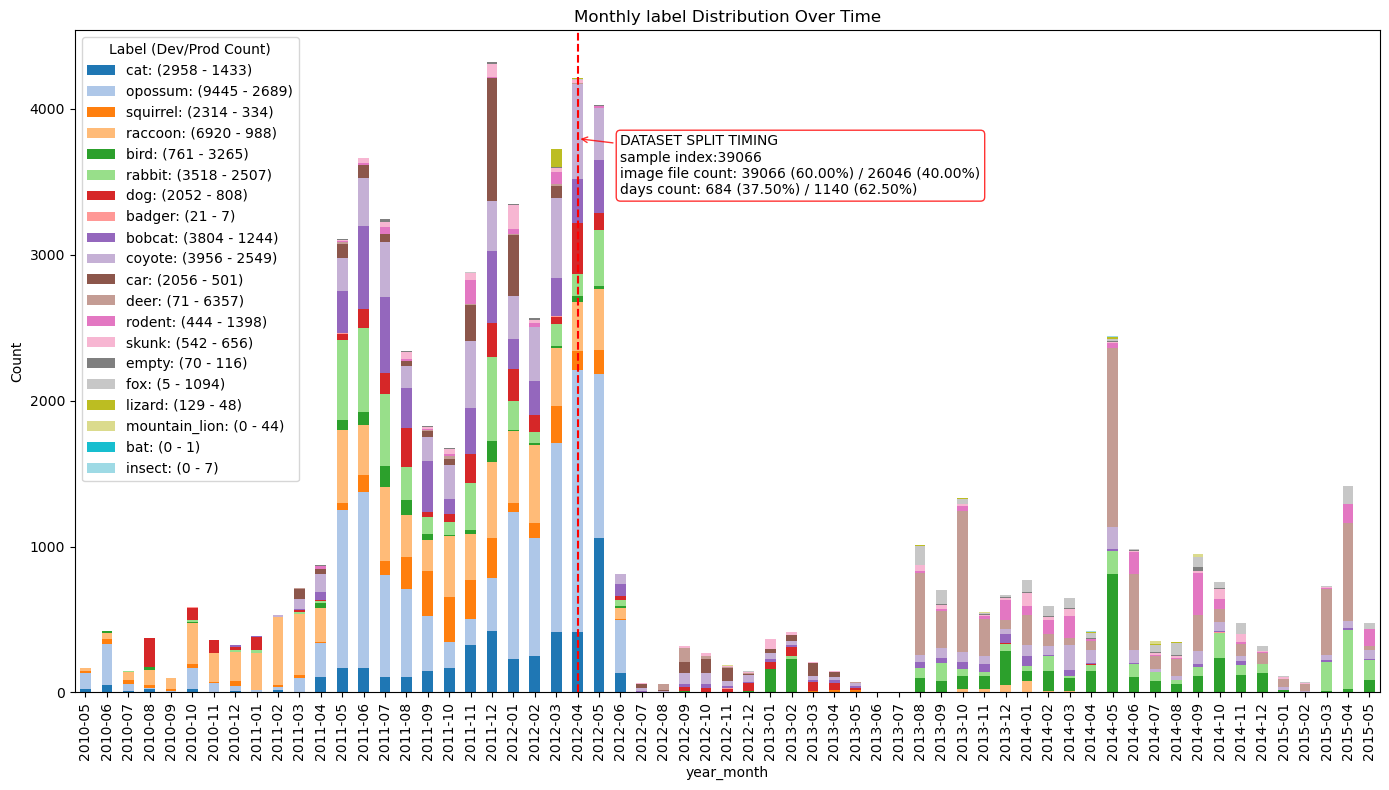

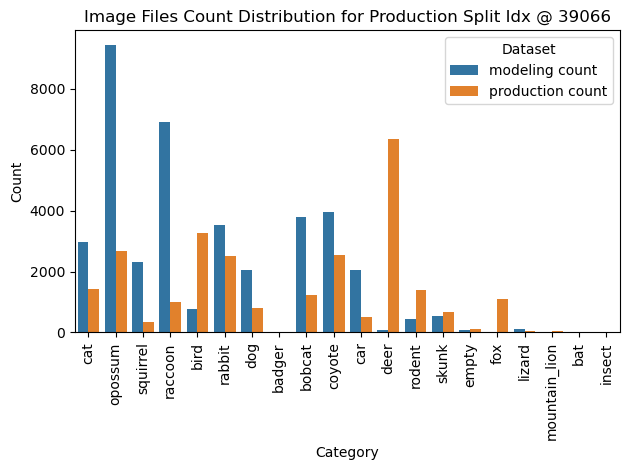

In [69]:
# plot monthly label distribution of the entire dataset
# mark the hypothetical production start index with a vertical line @ 40% image file count partition
split_idx = 39066
monthly_counts = plot_monthly_class_distribution(grp_meta_df, feature_name = 'label', color_palette='tab20', production_start_idx = split_idx)

In [70]:
monthly_counts

label,cat,opossum,squirrel,raccoon,bird,rabbit,dog,badger,bobcat,coyote,car,deer,rodent,skunk,empty,fox,lizard,mountain_lion,bat,insect
2010-05,27,104,15,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-06,54,279,36,37,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-07,12,45,30,53,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-08,22,8,22,99,25,0,199,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-09,0,9,16,74,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01,0,0,0,0,19,0,0,0,0,15,0,58,0,14,2,3,0,0,0,0
2015-02,0,0,0,0,0,0,0,0,0,9,0,51,0,6,0,8,0,0,0,0
2015-03,0,0,0,0,10,202,0,0,9,37,0,451,5,12,0,3,0,0,0,0
2015-04,0,0,0,0,24,407,0,0,8,54,0,670,131,0,0,119,0,0,0,0


In [71]:
monthly_counts.loc['2012-04'].sum()


4209

In [72]:
monthly_counts.loc['2012-03'].sum()

3723

In [73]:
65112*0.4, 65112*0.10, 

(26044.800000000003, 6511.200000000001)

In [30]:
train_cutoff = '2011-12'
monthly_counts.loc[:train_cutoff].sum().sum()

28048

In [35]:
monthly_counts.loc['2012-03':
                   '2012-04'].sum().sum()

7932

In [ ]:
# we do batch transforms monthly
# 43% (28048) for training which means all images from the beginning til end of Dec 2011 - for training
# 9% (5914) for validation which means all images from Jan 2012 to Feb 2012 - for hyperparameter tuning
# 12.2% (7932) for testing which means all images from Mar 2012 to Apr 2012 - for model comparison
# 35.6% (23218) for production which means all images from May 2012 til end of dataset


,modeling count,production count
label,,
cat,4391,0
opossum,12134,0
squirrel,2634,14
raccoon,7697,211
bird,1231,2795
rabbit,4048,1977
dog,2848,12
badger,25,3
bobcat,4598,450


<Figure size 1400x800 with 0 Axes>

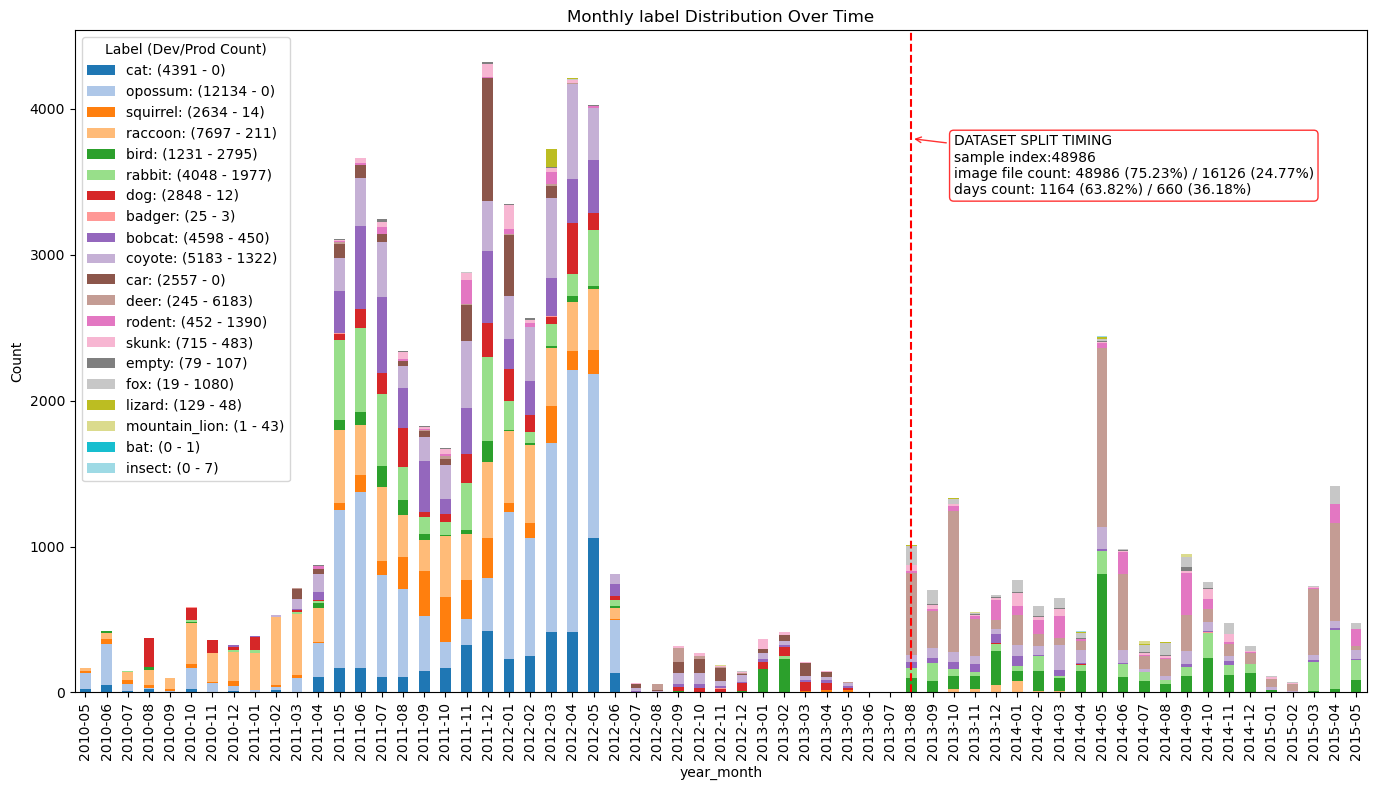

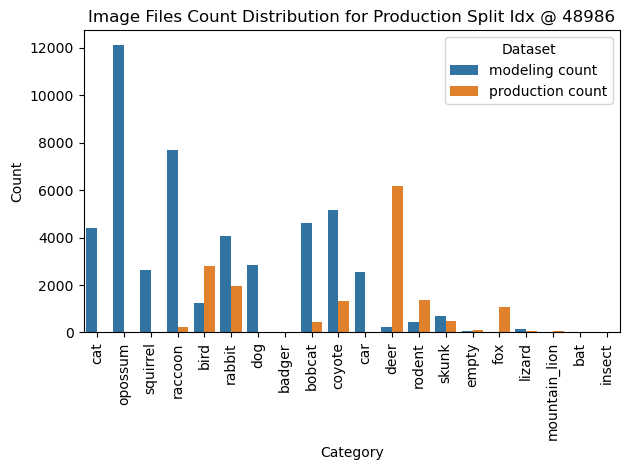

In [85]:
# plot eda/stats if production split is based on number of days
split_idx = 48986
monthly_label_df = plot_monthly_class_distribution(grp_meta_df, feature_name = 'label', color_palette='tab20', production_start_idx = split_idx)

In [37]:
grp_meta_df.head()

,filename,label,category_id,bbox,image_id,location,split_type,date_captured,year_month
15820,585f4d43-23d2-11e8-a6a3-ec086b02610b_0.jpg,cat,16,"[1200.64, 568.32, 146.7734375, 246.613359375]",585f4d43-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 20:32:56,2010-05
3499,59180801-23d2-11e8-a6a3-ec086b02610b_0.jpg,cat,16,"[999.253359375, 404.48, 129.706640625, 218.453...",59180801-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 20:32:57,2010-05
44281,588dba7d-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[1213.44, 637.44, 212.48, 271.36]",588dba7d-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:28,2010-05
34228,58bea7d7-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[1062.4, 808.96, 279.04, 238.08]",58bea7d7-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:29,2010-05
36935,58a8a344-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[870.4, 960.0, 261.12, 337.92]",58a8a344-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:30,2010-05


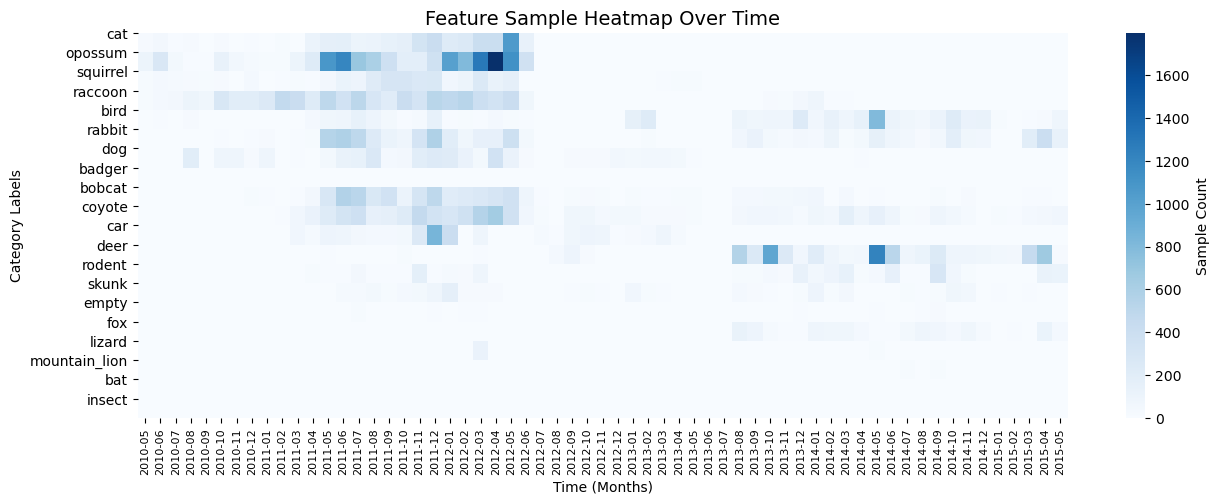

In [90]:
df = monthly_label_df.copy()
plt.figure(figsize=(15, 5))
sns.heatmap(
    df.T,  # Transpose to put features on y-axis
    cmap='Blues',
    cbar_kws={'label': 'Sample Count'},
    xticklabels=[m for m in df.index],
    yticklabels=False
)
plt.title('Feature Sample Heatmap Over Time', fontsize=14)
plt.xlabel('Time (Months)', fontsize=10)
plt.ylabel('Category Labels', fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(range(0, df.shape[1], 1), [f'{i}' for i in df.columns.tolist()])
plt.show()

/var/folders/9z/w62pgfx92qv9tjyd0820s5h00000gn/T/ipykernel_81303/2047483412.py:126: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

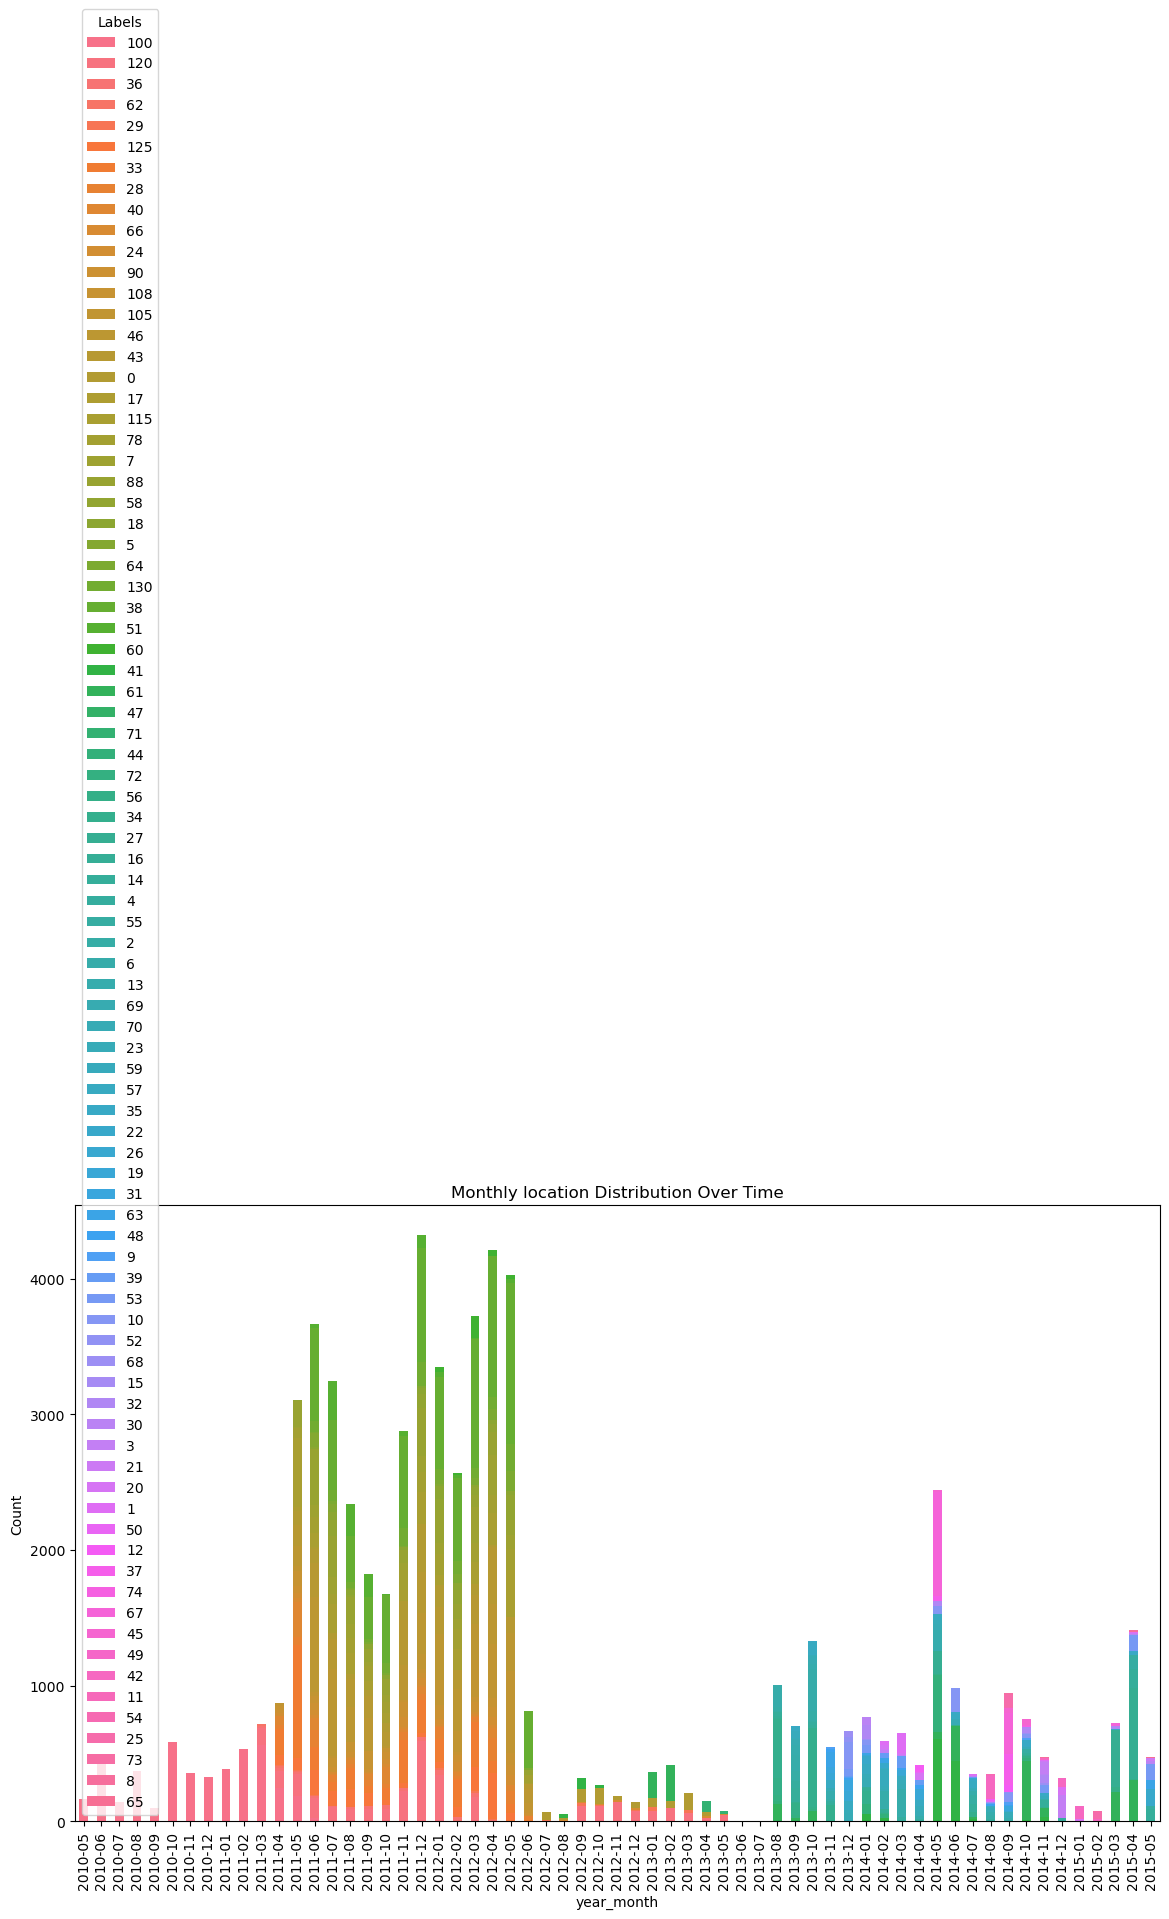

In [75]:
# try location distribution changes
monthly_loc_df = plot_monthly_class_distribution(grp_meta_df, feature_name = 'location', color_palette='husl')

In [76]:
monthly_loc_df.head()

location,100,120,36,62,29,125,33,28,40,66,...,67,45,49,42,11,54,25,73,8,65
2010-05,165,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-06,424,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07,144,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-08,375,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-09,101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
monthly_loc_df.loc['2010-05']

location
0        0
1        0
10       0
100    165
105      0
      ... 
78       0
8        0
88       0
9        0
90       0
Name: 2010-05, Length: 85, dtype: int64

In [48]:
# Resample data into time bins (e.g., weekly)
len(grp_meta_df['location'].unique())

85

In [42]:
df_melted = monthly_loc_df.reset_index().melt(id_vars='index', var_name='location', value_name='count')
df_melted.head()

,index,location,count
0,2010-05,0,0
1,2010-06,0,0
2,2010-07,0,0
3,2010-08,0,0
4,2010-09,0,0


In [53]:
monthly_loc_df.shape[1]

85

In [50]:
len(monthly_loc_df)

61

In [52]:
monthly_loc_df.head()

location,0,1,10,100,105,108,11,115,12,120,...,70,71,72,73,74,78,8,88,9,90
2010-05,0,0,0,165,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-06,0,0,0,424,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07,0,0,0,144,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-08,0,0,0,375,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-09,0,0,0,101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
monthly_loc_df.T

,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,...,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05
location,,,,,,,,,,,,,,,,,,,,,
100,165,424,144,375,101,585,358,328,390,532,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0,0,0,0,0,0,0,0,0,0,...,1,10,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,82,0,0,0,0,51,0,0,0
73,0,0,0,0,0,0,0,0,0,0,...,0,18,0,0,0,0,3,0,0,0


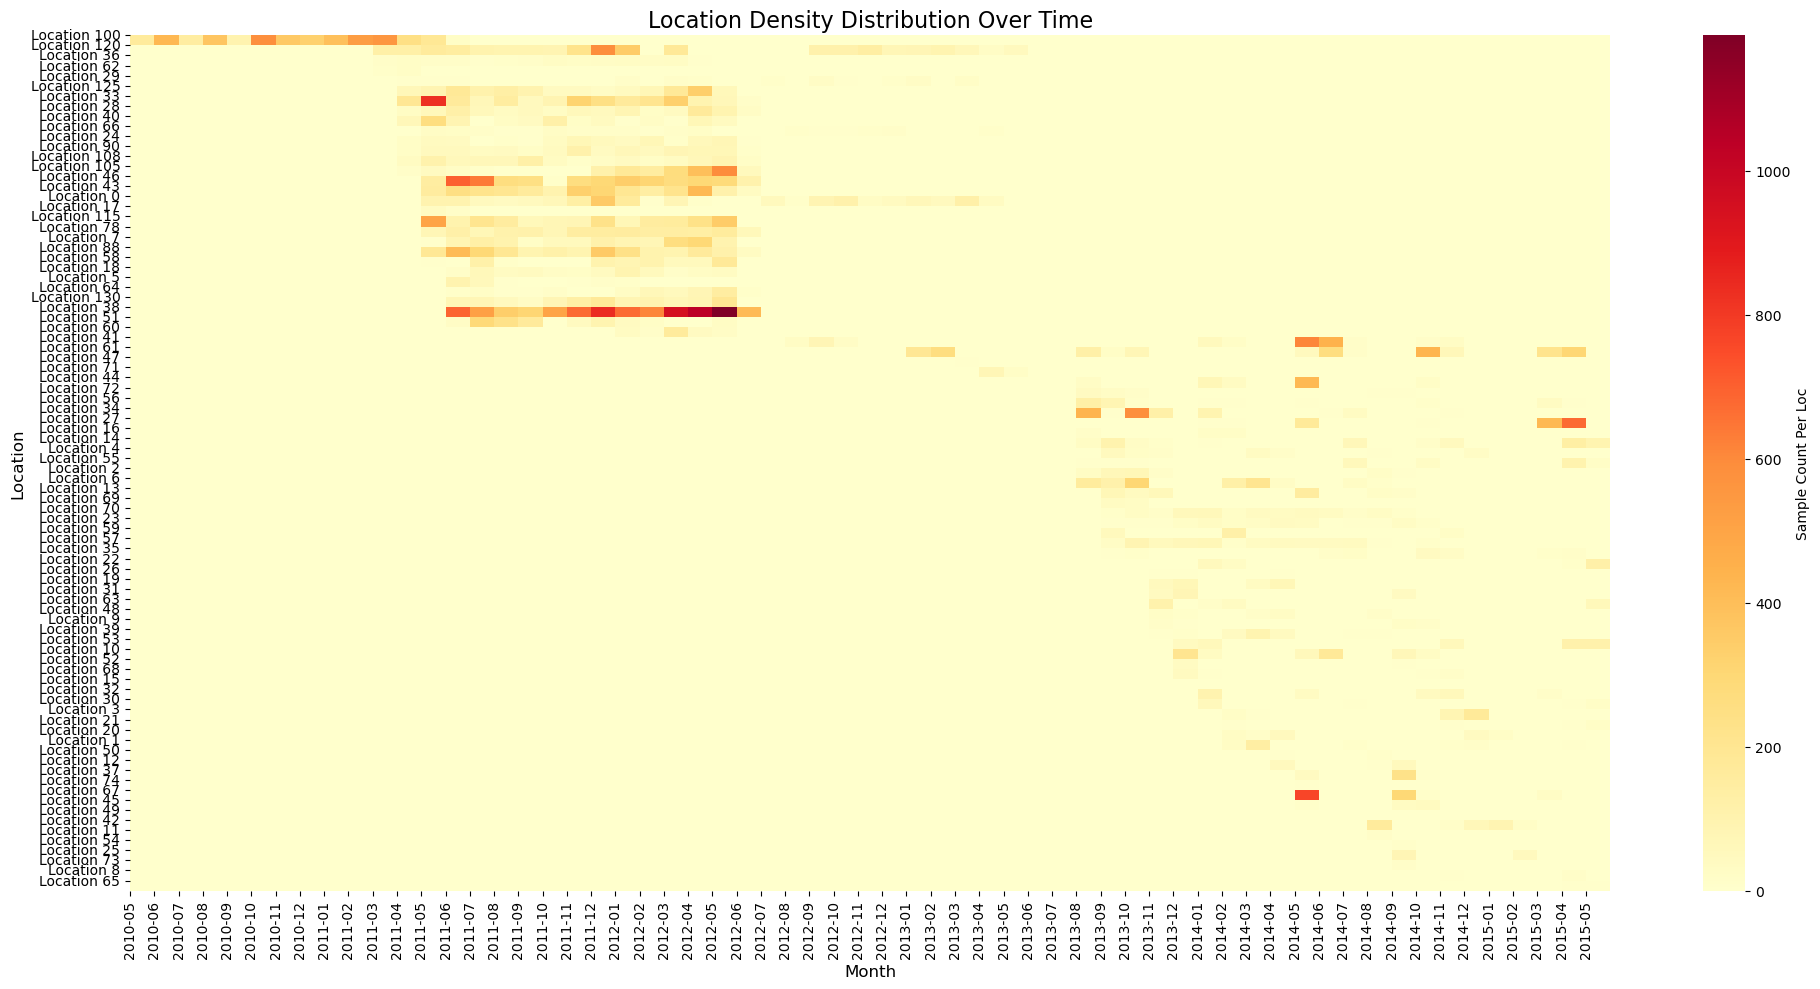

In [78]:
# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(monthly_loc_df.T, cmap='YlOrRd', cbar_kws={'label': 'Sample Count Per Loc'})

# Customize the plot
plt.title('Location Density Distribution Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Location', fontsize=12)

# Adjust x-axis ticks to show dates
plt.xticks(range(0, 61), [date for date in monthly_loc_df.index], rotation=90)

# Adjust y-axis ticks to show feature numbers
plt.yticks(range(0, monthly_loc_df.shape[1], 1), [f'Location {i}' for i in monthly_loc_df.columns.tolist()])

plt.tight_layout()
plt.show()

/var/folders/9z/w62pgfx92qv9tjyd0820s5h00000gn/T/ipykernel_81303/699622619.py:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


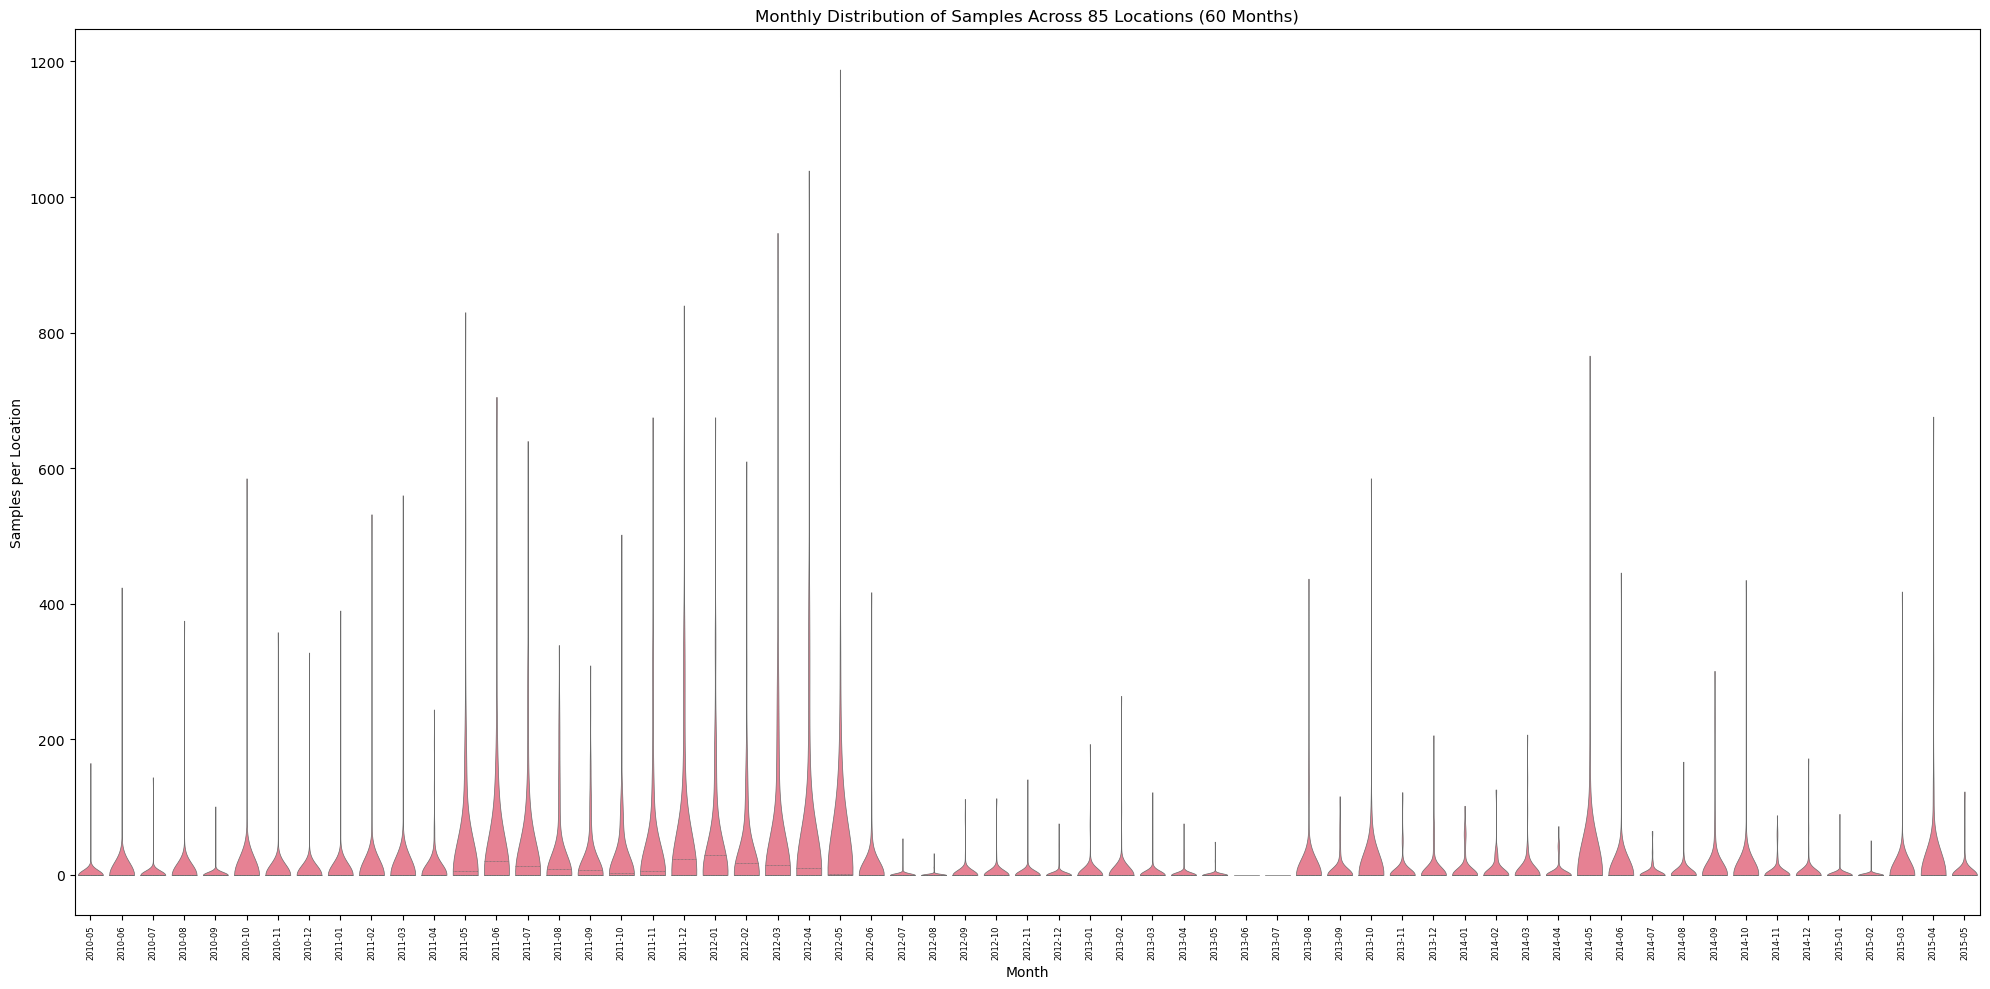

In [81]:
# violin plot
# Reshape data for plotting
df = monthly_loc_df.copy()

long_df = df.reset_index().melt(
    id_vars='index', 
    var_name='Location ID', 
    value_name='Samples'
).rename(columns={'index': 'Month'})

# Convert dates to strings for better plotting
#long_df['Month'] = long_df['Month'].dt.strftime('%Y-%m')

# Create violin plot
plt.figure(figsize=(20, 10))
sns.violinplot(
    data=long_df,
    x='Month',
    y='Samples',
    orient='v',
    inner='quartile',
    scale='width',
    linewidth=0.5,
    cut=0
)
plt.xticks(rotation=90, fontsize=6)
plt.title('Monthly Distribution of Samples Across 85 Locations (60 Months)')
plt.xlabel('Month')
plt.ylabel('Samples per Location')
plt.tight_layout()
plt.show()

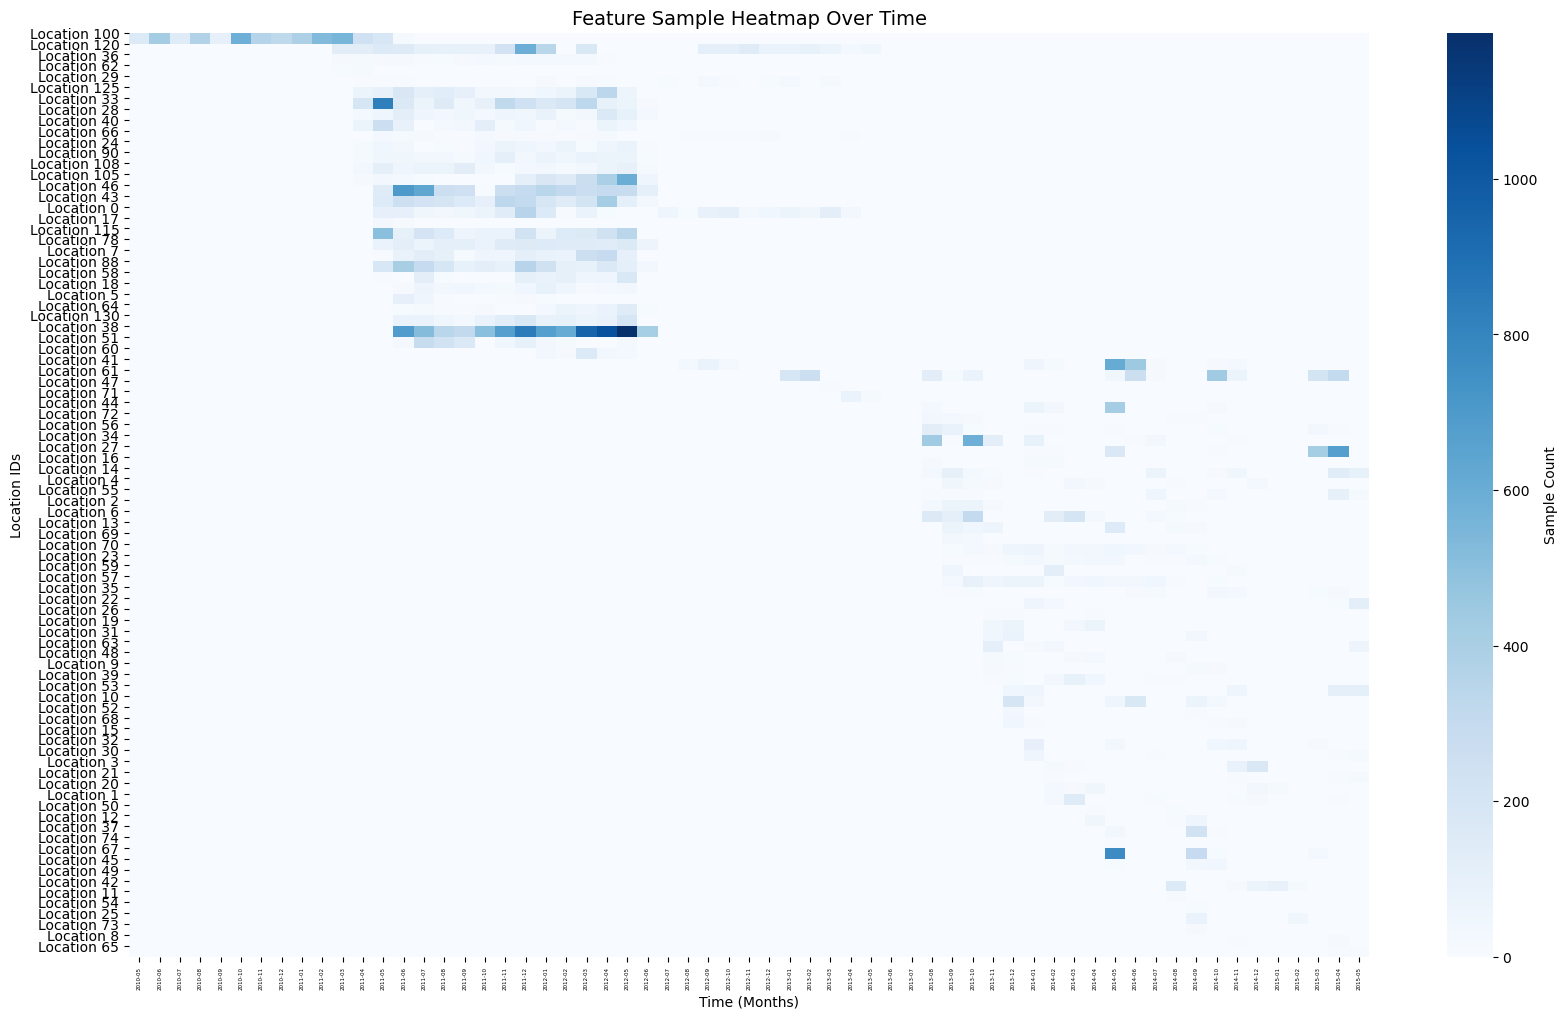

In [109]:
df = monthly_loc_df.copy()
plt.figure(figsize=(20, 12))
sns.heatmap(
    df.T,  # Transpose to put features on y-axis
    cmap='Blues',
    cbar_kws={'label': 'Sample Count'},
    xticklabels=[m for m in df.index],
    yticklabels=False
)
plt.title('Feature Sample Heatmap Over Time', fontsize=14)
plt.xlabel('Time (Months)', fontsize=10)
plt.ylabel('Location IDs', fontsize=10)
plt.xticks(rotation=90, fontsize=4)
plt.yticks(range(0, df.shape[1], 1), [f'Location {i}' for i in df.columns.tolist()])
plt.show()

In [91]:
grp_meta_df.head()

,filename,label,category_id,bbox,image_id,location,split_type,date_captured,year_month
15820,585f4d43-23d2-11e8-a6a3-ec086b02610b_0.jpg,cat,16,"[1200.64, 568.32, 146.7734375, 246.613359375]",585f4d43-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 20:32:56,2010-05
3499,59180801-23d2-11e8-a6a3-ec086b02610b_0.jpg,cat,16,"[999.253359375, 404.48, 129.706640625, 218.453...",59180801-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 20:32:57,2010-05
44281,588dba7d-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[1213.44, 637.44, 212.48, 271.36]",588dba7d-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:28,2010-05
34228,58bea7d7-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[1062.4, 808.96, 279.04, 238.08]",58bea7d7-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:29,2010-05
36935,58a8a344-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[870.4, 960.0, 261.12, 337.92]",58a8a344-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:30,2010-05


In [94]:
val_loc_ids = grp_meta_df[grp_meta_df['split_type']=='val']['location'].unique().tolist()
val_loc_ids

['100',
 '125',
 '28',
 '40',
 '105',
 '46',
 '0',
 '78',
 '7',
 '130',
 '60',
 '72',
 '34',
 '27',
 '69',
 '19',
 '63',
 '9',
 '68',
 '32',
 '30',
 '1',
 '37',
 '74',
 '67',
 '45',
 '42',
 '54',
 '8']

In [98]:
train_loc_ids

['120',
 '36',
 '62',
 '29',
 '33',
 '66',
 '24',
 '90',
 '108',
 '43',
 '17',
 '115',
 '88',
 '58',
 '18',
 '5',
 '64',
 '38',
 '51',
 '41',
 '61',
 '47',
 '71',
 '44',
 '56',
 '16',
 '14',
 '4',
 '55',
 '2',
 '6',
 '13',
 '70',
 '23',
 '59',
 '57',
 '35',
 '22',
 '26',
 '31',
 '48',
 '39',
 '53',
 '10',
 '52',
 '15',
 '3',
 '21',
 '20',
 '50',
 '12',
 '49',
 '11',
 '25',
 '73',
 '65']

In [99]:
mask1

array([ True, False, False, False, False,  True, False,  True,  True,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
        True, False,  True,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
       False, False,  True, False])

In [100]:
mask2

array([False,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True, False, False, False, False,  True, False,  True, False,
        True,  True, False,  True])

In [103]:
df = monthly_loc_df.copy()
df.T[mask1].head()

,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,...,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05
location,,,,,,,,,,,,,,,,,,,,,
100,165,424,144,375,101,585,358,328,390,532,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df.T[mask2].head()

,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,...,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05
location,,,,,,,,,,,,,,,,,,,,,
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
df = monthly_loc_df.copy()

# Create masks for each subset
train_mask = df.columns.isin(train_loc_ids)
len(train_mask)

85

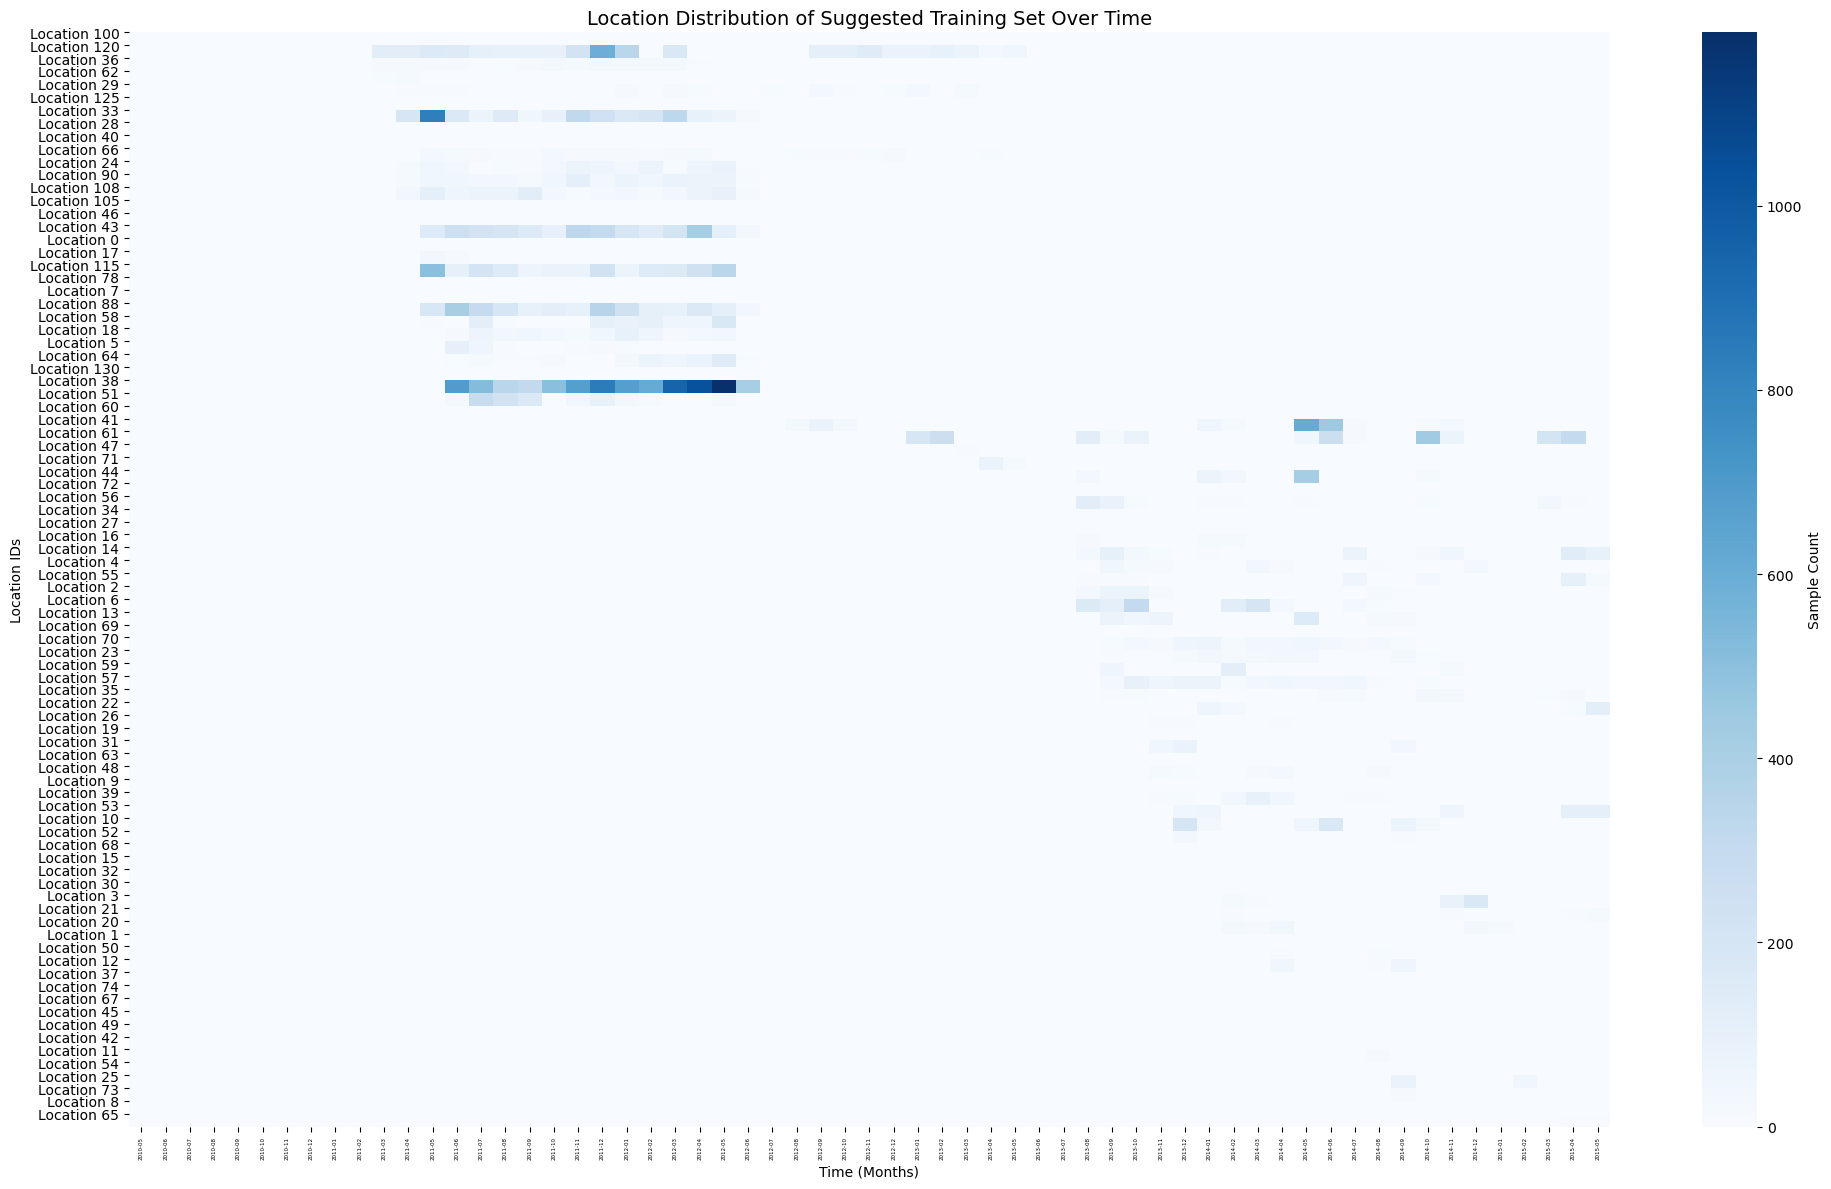

In [117]:
# apply original train-val split filter
# Define subsets (adjust these lists to your actual features)
train_loc_ids = grp_meta_df[grp_meta_df['split_type']=='train']['location'].unique().tolist()
val_loc_ids = grp_meta_df[grp_meta_df['split_type']=='val']['location'].unique().tolist()
#subset1 = features[:40]   # First 40 features
#subset2 = features[40:]   # Remaining 100

df = monthly_loc_df.copy()

# set val locations to 0
df[val_loc_ids] = 0

plt.figure(figsize=(20, 12))
sns.heatmap(
    df.T,  # Transpose to put features on y-axis
    cmap='Blues',
    cbar_kws={'label': 'Sample Count'},
    xticklabels=[m for m in df.index],
    yticklabels=False
)
plt.title('Location Distribution of Suggested Training Set Over Time', fontsize=14)
plt.xlabel('Time (Months)', fontsize=10)
plt.ylabel('Location IDs', fontsize=10)
plt.xticks(rotation=90, fontsize=4)
plt.yticks(range(0, df.shape[1], 1), [f'Location {i}' for i in df.columns.tolist()])

plt.tight_layout()
plt.show()



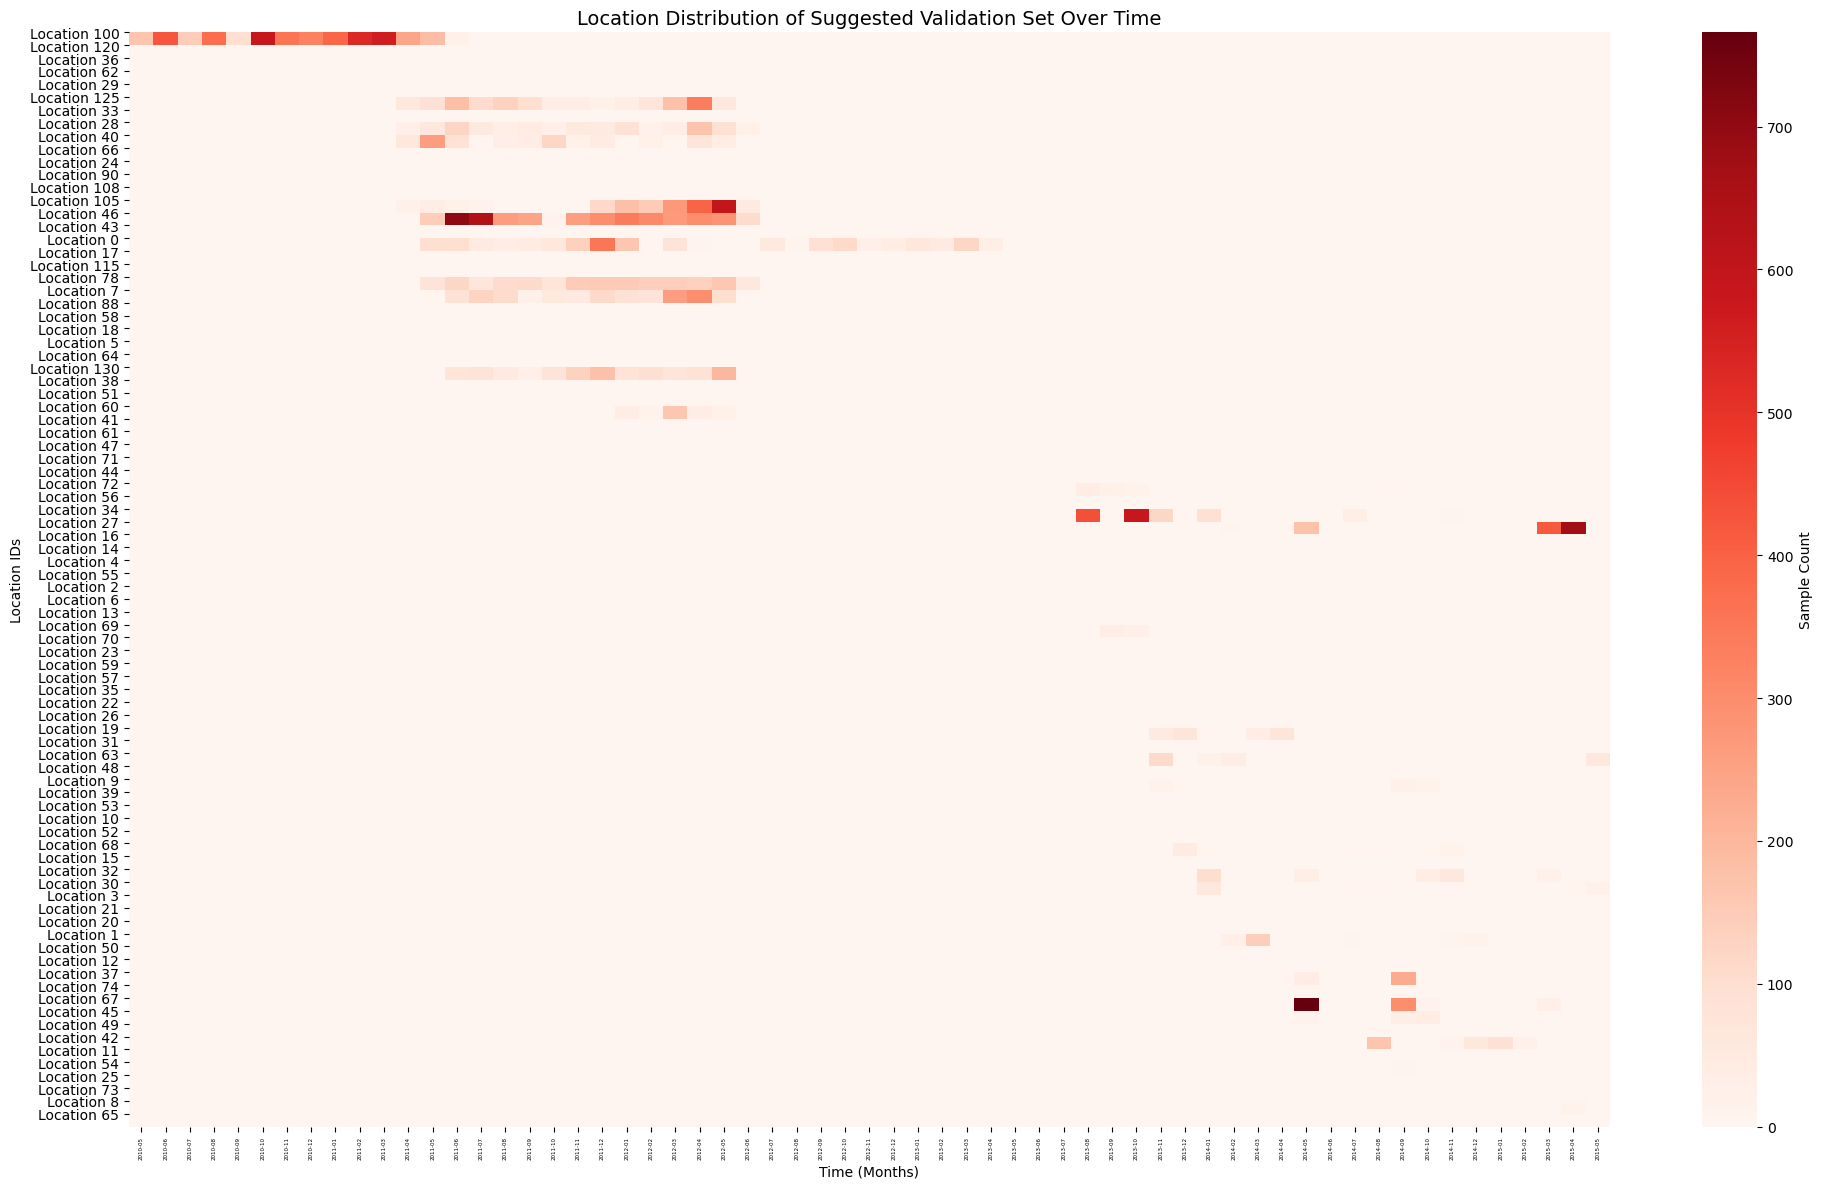

In [118]:
df = monthly_loc_df.copy()

# set train locations to 0
df[train_loc_ids] = 0

plt.figure(figsize=(20, 12))
sns.heatmap(
    df.T,  # Transpose to put features on y-axis
    cmap='Reds',
    cbar_kws={'label': 'Sample Count'},
    xticklabels=[m for m in df.index],
    yticklabels=False
)
plt.title('Location Distribution of Suggested Validation Set Over Time', fontsize=14)
plt.xlabel('Time (Months)', fontsize=10)
plt.ylabel('Location IDs', fontsize=10)
plt.xticks(rotation=90, fontsize=4)
plt.yticks(range(0, df.shape[1], 1), [f'Location {i}' for i in df.columns.tolist()])

plt.tight_layout()
plt.show()

In [ ]:
# apply suggested training and val split visuals
# Concatenate data for plotting (features on y, months on x)
data_for_plot = data.T

# Create two colormaps
from matplotlib import cm

# Get color arrays from two colormaps
cmap1 = cm.get_cmap('Blues', 128)
cmap2 = cm.get_cmap('Reds', 256)

colors1 = cmap1(np.linspace(0.2, 1, 40))   # Avoid very light colors
colors2 = cmap2(np.linspace(0.2, 1, 100))

# Combine into one ListedColormap
all_colors = np.vstack([colors1, colors2])
custom_cmap = ListedColormap(all_colors)

# Set up normalization so that each feature uses its own color range
# We'll normalize each row (feature) to its own min/max for best effect
# Alternatively, you can use a global vmin/vmax

fig, ax = plt.subplots(figsize=(24, 12))

# Plot heatmap using imshow for custom colormap
im = ax.imshow(data_for_plot, aspect='auto', cmap=custom_cmap)

# Set ticks and labels
ax.set_yticks(np.arange(len(features)))
ax.set_yticklabels(features, fontsize=6)
ax.set_xticks(np.arange(0, len(months), 3))
ax.set_xticklabels([m.strftime('%Y-%m') for m in months[::3]], rotation=90, fontsize=8)
ax.set_xlabel('Time (Months)')
ax.set_ylabel('Features')

# Add colorbars for each subset
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="2%", pad=0.05)
cax2 = divider.append_axes("right", size="2%", pad=0.25)

# Colorbar for subset1
cb1 = plt.colorbar(cm.ScalarMappable(cmap='Blues'), cax=cax1)
cb1.set_label('Subset 1 (40 features)')

# Colorbar for subset2
cb2 = plt.colorbar(cm.ScalarMappable(cmap='Reds'), cax=cax2)
cb2.set_label('Subset 2 (100 features)')

plt.title('Single Heatmap with Two Feature Color Schemes')
plt.tight_layout()
plt.show()


/opt/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


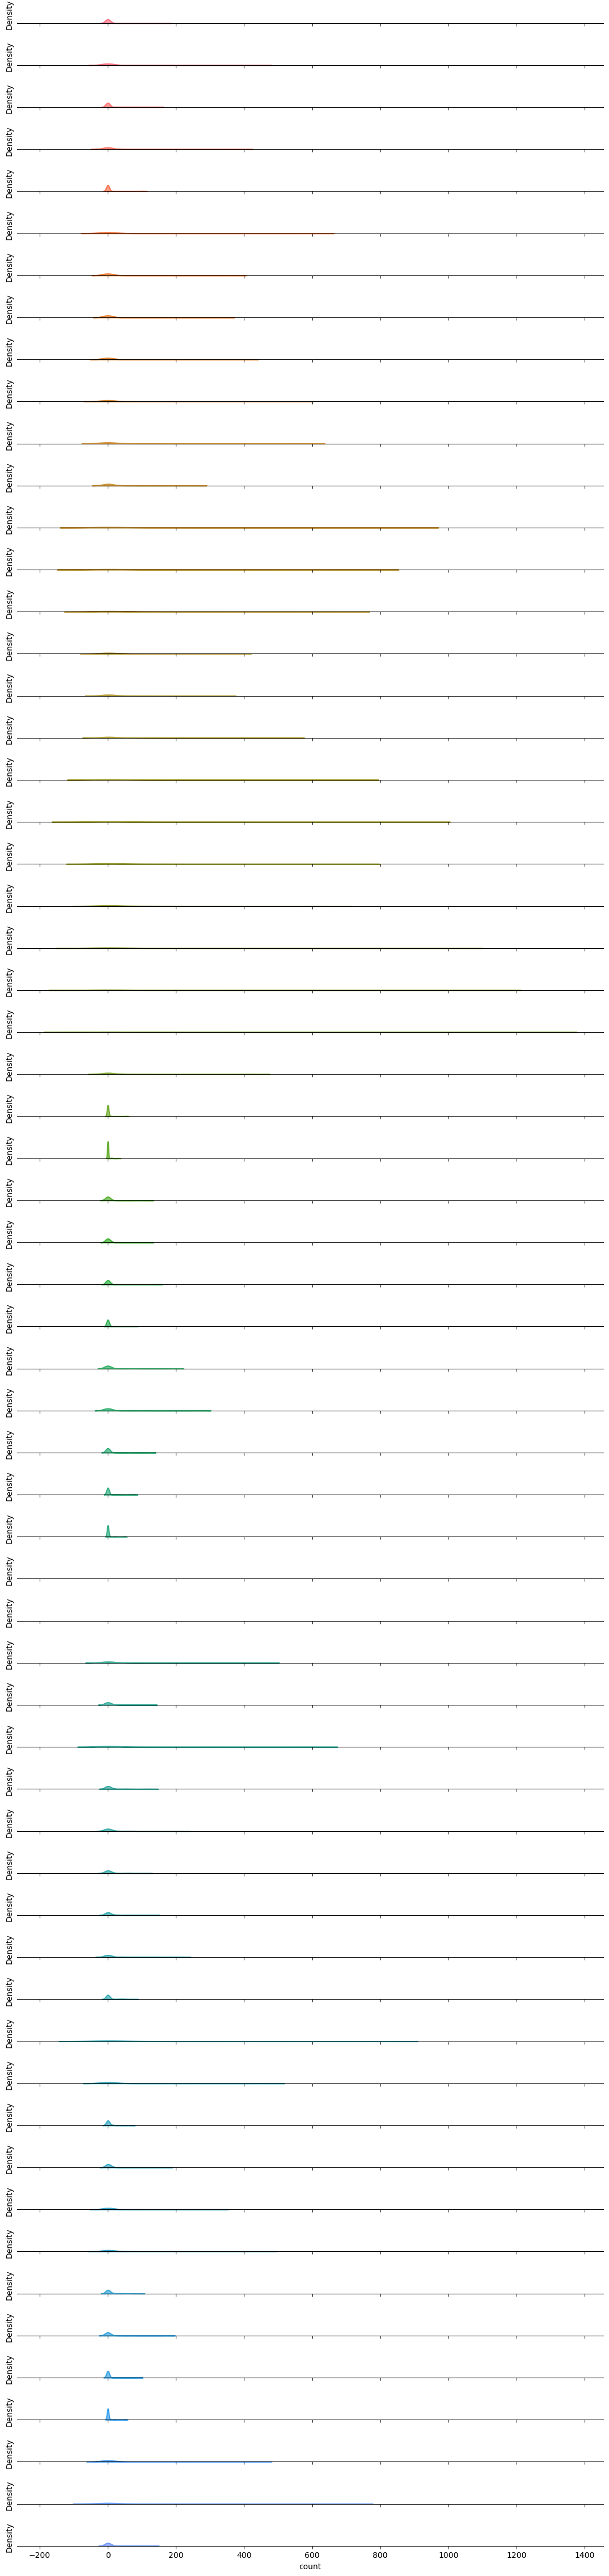

In [63]:

# Resample data into time bins (e.g., weekly)
#df_resampled = grp4_meta_df.resample('W').sum()  # Adjust frequency as needed

# Melt DataFrame for Seaborn compatibility
#df_melted = df_resampled.reset_index().melt(id_vars='index', var_name='feature', value_name='count')
df = monthly_loc_df.copy()
df_melted = df.reset_index().melt(
    id_vars='index', 
    var_name='Location ID', 
    value_name='count'
)#.rename(columns={'index': 'Month'})

# Create ridge plot
g = sns.FacetGrid(df_melted, row='index', hue='index', aspect=15, height=0.75)
g.map(sns.kdeplot, 'count', clip_on=False, fill=True, alpha=0.7, linewidth=1.5)
#g.fig.subplots_adjust(hspace=-0.3)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

In [ ]:


# get unique animal categories

In [158]:
# Create LST files separating Train, Val, Test, and Production based on Time

# we do batch transforms monthly
# 43% (28048) for training which means all images from the beginning til end of Dec 2011 - for training
# 9% (5914) for validation which means all images from Jan 2012 to Feb 2012 - for hyperparameter tuning
# 12.2% (7932) for testing which means all images from Mar 2012 to Apr 2012 - for model comparison
# 35.6% (23218) for production which means all images from May 2012 til end of dataset

# Load time-series list of images
grp_meta_time_df = grp_meta_df.copy() # replace code later using csv file generated by athena query
grp_meta_time_df = grp_meta_time_df.reset_index(drop=True)

# set val, test, prod start index 
val_start = 28049
test_start = 33962
prod_start = 41894

# split dev and prod data according to time-split
dev_df = grp_meta_time_df[:prod_start].copy()
prod_df = grp_meta_time_df[prod_start:].copy()

# check label distributions
display(dev_df['label'].value_counts())
display(prod_df['label'].value_counts())
#display(grp_meta_time_df[:prod_start]['label'].value_counts())
#display(grp_meta_time_df[prod_start:]['label'].value_counts())

# map unique labels to integers within the number of unique category_ids in the dev set
categories = dev_df['label'].unique()
label_map = {category: idx for idx, category in enumerate((categories))}
display(label_map)



opossum     10644
raccoon      7195
coyote       4352
bobcat       4002
rabbit       3603
cat          3200
squirrel     2415
dog          2332
car          2056
bird          791
skunk         560
rodent        445
lizard        129
deer           72
empty          70
badger         21
fox             7
Name: label, dtype: int64

deer             6356
bird             3235
rabbit           2422
coyote           2153
opossum          1490
rodent           1397
cat              1191
fox              1092
bobcat           1046
raccoon           713
skunk             638
dog               528
car               501
squirrel          233
empty             116
lizard             48
mountain_lion      44
badger              7
insect              7
bat                 1
Name: label, dtype: int64

{'cat': 0,
 'opossum': 1,
 'squirrel': 2,
 'raccoon': 3,
 'bird': 4,
 'rabbit': 5,
 'dog': 6,
 'badger': 7,
 'bobcat': 8,
 'coyote': 9,
 'car': 10,
 'deer': 11,
 'rodent': 12,
 'skunk': 13,
 'empty': 14,
 'fox': 15,
 'lizard': 16}

In [159]:
dev_df.head()

,filename,label,category_id,bbox,image_id,location,split_type,date_captured,year_month
0,585f4d43-23d2-11e8-a6a3-ec086b02610b_0.jpg,cat,16,"[1200.64, 568.32, 146.7734375, 246.613359375]",585f4d43-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 20:32:56,2010-05
1,59180801-23d2-11e8-a6a3-ec086b02610b_0.jpg,cat,16,"[999.253359375, 404.48, 129.706640625, 218.453...",59180801-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 20:32:57,2010-05
2,588dba7d-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[1213.44, 637.44, 212.48, 271.36]",588dba7d-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:28,2010-05
3,58bea7d7-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[1062.4, 808.96, 279.04, 238.08]",58bea7d7-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:29,2010-05
4,58a8a344-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[870.4, 960.0, 261.12, 337.92]",58a8a344-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:30,2010-05


In [160]:
# add integer label mapping to both dev and prod sets
dev_df['label_enc'] = dev_df['label'].map(label_map)

# generate lst files for dev set, no need to reset index because the images are in the same s3 bucket/prefix location.
# training
dev_df[0:val_start][['label_enc', 'filename']].to_csv('train.lst', sep='\t', header=False, index=True)

# validation
dev_df[val_start:test_start][['label_enc', 'filename']].to_csv('validation.lst', sep='\t', header=False, index=True)

# test
dev_df[test_start:prod_start][['label_enc', 'filename']].to_csv('test.lst', sep='\t', header=False, index=True)

In [161]:
# save label to encoded_cat_id mapping to json file

with open('label_to_enc.json', 'w') as f:
    json.dump(label_map, f, indent=4)  # indent=4 makes the file human-readable

In [ ]:
# project bucket
bucket_name = "aai-540-data"

# specify s3 validation dataset
# image source and lst files
images_prefix = "cct_resized"
s3_images_location = f"s3://{bucket_name}/{images_prefix}/"
s3_validation_lst = f"s3://{bucket_name}/dev_split/validation.lst"

In [146]:
# create manifest files for batch transform 
# create manifest files for validation, test, and production
import json

# project bucket
bucket_name = "aai-540-data"

# specify s3 validation dataset
# image source and lst files
images_prefix = "cct_resized"
s3_images_location = f"s3://{bucket_name}/{images_prefix}/"



# Read your .lst file (each line: index label s3_uri)
with open('validation.lst', 'r') as lst_file:
    lst_lines = lst_file.readlines()

# Write to manifest file
with open('validation_manifest.json', 'w') as manifest_file:
    for line in lst_lines:
        parts = line.strip().split()  # split by whitespace
        s3_uri = f"{s3_images_location}{parts[-1]}"            # last part is the S3 URI
        manifest_entry = {"source-ref": s3_uri,
                          "true_category" : parts[-2]}
        manifest_file.write(json.dumps(manifest_entry) + '\n')

In [147]:
label_map

{16: 0,
 1: 1,
 5: 2,
 3: 3,
 11: 4,
 10: 5,
 8: 6,
 21: 7,
 6: 8,
 9: 9,
 33: 10,
 34: 11,
 99: 12,
 7: 13,
 30: 14,
 51: 15,
 14: 16,
 40: 17,
 66: 18,
 97: 19}

In [ ]:
# save to csv
grp_meta_df.to_csv('./grp4_metadata_with_datetime.csv', index=False)

In [150]:
label_map[34]

11